<a href="https://colab.research.google.com/github/ashu017/Garbage-Classification/blob/master/garbageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras_applications import imagenet_utils
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [0]:
model = VGG16(include_top=True, weights='imagenet')

W0720 00:15:49.369273 139917143324544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 00:15:49.427772 139917143324544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 00:15:49.440435 139917143324544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 00:15:49.506558 139917143324544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



553467904/553467096 [==============================] - 12s 0us/step


W0720 00:16:02.677264 139917143324544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0720 00:16:02.678923 139917143324544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [0]:
import numpy as np
import os
import time
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
data_path = "gdrive/My Drive/Garbage classification/Garbage classification"
data_dir_list = os.listdir(data_path)
img_data_list=[]

In [0]:
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
		x = x/255
		#print('Input image shape:', x.shape)
		img_data_list.append(x)

IndentationError: ignored

In [0]:
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(5054, 1, 224, 224, 3)
(1, 5054, 224, 224, 3)
(5054, 224, 224, 3)


In [0]:
num_classes = 6
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:403]=0
labels[403:885]=1
labels[885:1022]=2
labels[1022:1432]=3
labels[1432:1933]=4
labels[1933:]=5

names = ['cardboard','plastic', 'trash','metal', 'glass', 'paper']

In [0]:
Y = np_utils.to_categorical(labels, num_classes)
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

TypeError: ignored

In [0]:
image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

In [0]:
custom_vgg_model.layers[3].trainable

False

In [0]:
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

W0720 00:51:06.381397 139917143324544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

Train on 2021 samples, validate on 506 samples
Epoch 1/5
2016/2021 [============================>.] - ETA: 2s - loss: 1.8512 - acc: 0.3199 

KeyboardInterrupt: ignored

In [0]:
IMG_SHAPE = (224,224,3)
from keras.applications.mobilenet_v2 import MobileNetV2
base_model = MobileNetV2(input_shape= IMG_SHAPE, include_top=False, weights='imagenet')

W0720 01:37:38.693711 139917143324544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



9412608/9406464 [==============================] - 0s 0us/step


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
base_model.trainable = False
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(6, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
batch_size = 64
epochs = 5

history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

Train on 2021 samples, validate on 506 samples
Epoch 1/5
2021/2021 [==============================] - 304s 151ms/step - loss: 0.3941 - acc: 0.8394 - val_loss: 0.3660 - val_acc: 0.8478
Epoch 2/5
2021/2021 [==============================] - 299s 148ms/step - loss: 0.2751 - acc: 0.8912 - val_loss: 0.3312 - val_acc: 0.8653
Epoch 3/5
2021/2021 [==============================] - 293s 145ms/step - loss: 0.2311 - acc: 0.9104 - val_loss: 0.3267 - val_acc: 0.8679
Epoch 4/5
2021/2021 [==============================] - 297s 147ms/step - loss: 0.2100 - acc: 0.9188 - val_loss: 0.3515 - val_acc: 0.8587
Epoch 5/5
2021/2021 [==============================] - 295s 146ms/step - loss: 0.1952 - acc: 0.9246 - val_loss: 0.3196 - val_acc: 0.8715


[0.8393534311028414, 0.8912254438607897, 0.9104403559374726, 0.9187695676297731, 0.9246247530219461]
[0.847826083658241, 0.8652832512798988, 0.8679182920531322, 0.8586956363892838, 0.871541489961119]


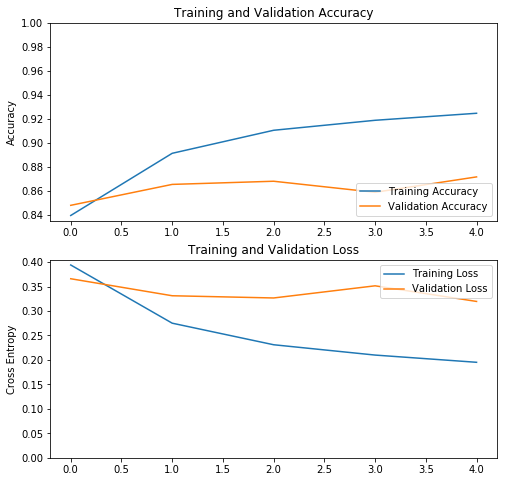

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
print(acc)
print(val_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [0]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr=2e-5),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7686      
Total params: 2,265,670
Trainable params: 1,870,278
Non-trainable params: 395,392
_________________________________________________________________


In [0]:
history_fine = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

Train on 2021 samples, validate on 506 samples
Epoch 1/5
2021/2021 [==============================] - 396s 196ms/step - loss: 0.1747 - acc: 0.9349 - val_loss: 0.1912 - val_acc: 0.9289
Epoch 2/5
2021/2021 [==============================] - 387s 192ms/step - loss: 0.1482 - acc: 0.9470 - val_loss: 0.1768 - val_acc: 0.9348
Epoch 3/5
2021/2021 [==============================] - 386s 191ms/step - loss: 0.1208 - acc: 0.9604 - val_loss: 0.1667 - val_acc: 0.9384
Epoch 4/5
2021/2021 [==============================] - 386s 191ms/step - loss: 0.1006 - acc: 0.9692 - val_loss: 0.1593 - val_acc: 0.9410
Epoch 5/5
2021/2021 [==============================] - 385s 190ms/step - loss: 0.0846 - acc: 0.9767 - val_loss: 0.1517 - val_acc: 0.9457


In [0]:
acc = history_fine.history['acc']
val_acc = history_fine.history['val_acc']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

print(acc)
print(val_acc)

[0.9348507210029817, 0.9469734273412215, 0.9604156253834516, 0.9692396407431745, 0.9767441718900398]
[0.9288537518780222, 0.9347825962093037, 0.938405782102125, 0.9410408407803109, 0.9456521802740134]


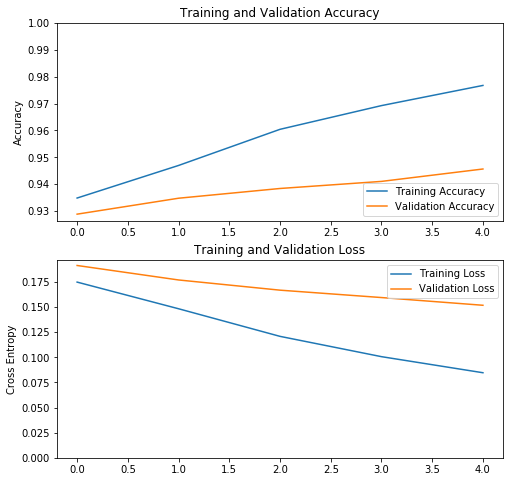

In [0]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

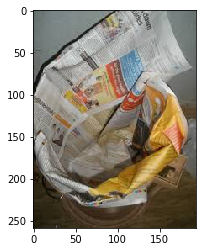

In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
img = load_img("gdrive/My Drive/download.jpg")
plt.imshow(img)

In [0]:
img_path = "gdrive/My Drive/download.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x = x/255
print('Input image shape:', x.shape)

Input image shape: (1, 224, 224, 3)


In [0]:
predicted = model.predict(x)
print(predicted.size)

6


In [0]:
print(predicted.shape)
print(predicted)

(1, 6)
[[0.16038933 0.02390872 0.00327906 0.02321739 0.00896226 0.70501417]]


In [0]:
i=0
for x in np.nditer(predicted):
  print(names[i] , end = ' ')
  print(x)
  i = i + 1

cardboard 0.16038933
plastic 0.023908723
trash 0.0032790564
metal 0.023217386
glass 0.008962262
paper 0.70501417


In [0]:
img_path = "gdrive/My Drive/Garbage classification/Garbage classification/plastic/plastic100.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x = x/255
print('Input image shape:', x.shape)

Input image shape: (1, 224, 224, 3)


In [0]:
predicted = model.predict(x)
print(predicted)

[[0.01337233 0.97711414 0.01103616 0.01360277 0.07564373 0.01009594]]


In [0]:
i=0
for x in np.nditer(predicted):
  print(names[i] , end = ' ')
  print(x)
  i = i + 1

cardboard 0.013372331
plastic 0.97711414
trash 0.01103616
metal 0.013602775
glass 0.07564373
paper 0.010095937


In [0]:
img_path = "gdrive/My Drive/corrugated-cardboard.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x = x/255
print('Input image shape:', x.shape)

Input image shape: (1, 224, 224, 3)


In [0]:
predicted = model.predict(x)
print(predicted)

[[0.5878822  0.06155694 0.05376197 0.00995768 0.01435279 0.66156644]]
